In [199]:
import numpy as np
import pandas as pd
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt

In [201]:
model_path = "/home/phung/jnotebook/source/Tuan7.2/stock_dl_model.h5"
model = load_model(model_path)


In [203]:
stock = "HPG.VN"
start = dt.datetime(2015, 2, 14)  # Ngày bắt đầu giống như khi train
end = dt.datetime.today()  # Lấy dữ liệu mới nhất đến hôm nay

# Tải dữ liệu mới
df = yf.download(stock, start, end)

# Kiểm tra dữ liệu
print(df.tail())

[*********************100%***********************]  1 of 1 completed

Price         Close     High      Low     Open    Volume
Ticker       HPG.VN   HPG.VN   HPG.VN   HPG.VN    HPG.VN
Date                                                    
2025-02-25  27500.0  27700.0  27200.0  27600.0  33168800
2025-02-26  27750.0  27950.0  27550.0  27600.0  32319600
2025-02-27  28450.0  28450.0  27600.0  27800.0  52685800
2025-02-28  28000.0  28400.0  27950.0  28400.0  25182600
2025-03-03  28050.0  28250.0  28000.0  28050.0  22228700


In [205]:
past_100_days = df.tail(100)  # Lấy 100 ngày gần nhất từ tập dữ liệu
final_df = past_100_days['Close'].values.reshape(-1,1)  # Chỉ lấy cột 'Close'


In [207]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df[['Close']])  # Fit lại scaler trên toàn bộ dữ liệu cũ
final_df_scaled = scaler.transform(final_df)


In [209]:
x_input = final_df_scaled.reshape(1, 100, 1)


In [211]:
future_predictions = []

for i in range(100):
    next_pred = model.predict(x_input)
    future_predictions.append(next_pred[0, 0])
    
    # Cập nhật dữ liệu đầu vào
    x_input = np.append(x_input[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━

In [213]:
future_predictions = np.array(future_predictions).reshape(-1,1)
future_predictions_real = scaler.inverse_transform(future_predictions)


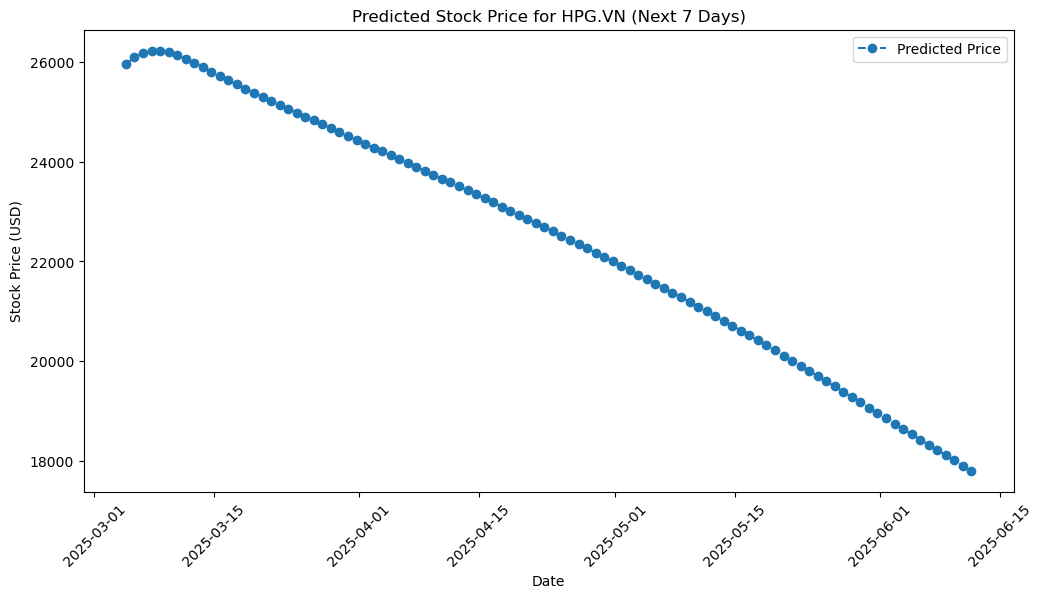

Date: 2025-03-04, Predicted Price: 25971.41 USD
Date: 2025-03-05, Predicted Price: 26096.79 USD
Date: 2025-03-06, Predicted Price: 26185.02 USD
Date: 2025-03-07, Predicted Price: 26228.84 USD
Date: 2025-03-08, Predicted Price: 26230.80 USD
Date: 2025-03-09, Predicted Price: 26198.62 USD
Date: 2025-03-10, Predicted Price: 26141.64 USD
Date: 2025-03-11, Predicted Price: 26068.50 USD
Date: 2025-03-12, Predicted Price: 25986.09 USD
Date: 2025-03-13, Predicted Price: 25899.34 USD
Date: 2025-03-14, Predicted Price: 25811.36 USD
Date: 2025-03-15, Predicted Price: 25723.92 USD
Date: 2025-03-16, Predicted Price: 25637.81 USD
Date: 2025-03-17, Predicted Price: 25553.23 USD
Date: 2025-03-18, Predicted Price: 25470.09 USD
Date: 2025-03-19, Predicted Price: 25388.13 USD
Date: 2025-03-20, Predicted Price: 25307.10 USD
Date: 2025-03-21, Predicted Price: 25226.78 USD
Date: 2025-03-22, Predicted Price: 25146.96 USD
Date: 2025-03-23, Predicted Price: 25067.54 USD
Date: 2025-03-24, Predicted Price: 24988

In [215]:
import datetime as dt
import matplotlib.pyplot as plt

dates = [dt.datetime.today() + dt.timedelta(days=i) for i in range(1, 101)]
plt.figure(figsize=(12,6))
plt.plot(dates, future_predictions_real, marker='o', linestyle='dashed', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title(f'Predicted Stock Price for {stock} (Next 7 Days)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# In kết quả dự đoán
for i in range(100):
    print(f"Date: {dates[i].strftime('%Y-%m-%d')}, Predicted Price: {future_predictions_real[i][0]:.2f} USD")


In [ ]:
tôi đã c